# Анализ бизнес-показателей интернет сервиса

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1">Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1">Описание данных</a></span></li></ul></li><li><span><a href="#Шаг-1.-Загрузим-данные-и-подготовим-их-к-анализу" data-toc-modified-id="Шаг-1.-Загрузим-данные-и-подготовим-их-к-анализу-2">Шаг 1. Загрузим данные и подготовим их к анализу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1">Вывод</a></span></li></ul></li><li><span><a href="#Шаг-2.-Рассчитаем-метрики-и-построим-графики" data-toc-modified-id="Шаг-2.-Рассчитаем-метрики-и-построим-графики-3">Шаг 2. Рассчитаем метрики и построим графики</a></span><ul class="toc-item"><li><span><a href="#2.1-Продуктовые-метрики" data-toc-modified-id="2.1-Продуктовые-метрики-3.1">2.1 Продуктовые метрики</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.2">Вывод</a></span></li><li><span><a href="#2.2-Метрики-электронной-коммерции" data-toc-modified-id="2.2-Метрики-электронной-коммерции-3.3">2.2 Метрики электронной коммерции</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4">Вывод</a></span></li><li><span><a href="#2.3-Маркетинговые-метрики" data-toc-modified-id="2.3-Маркетинговые-метрики-3.5">2.3 Маркетинговые метрики</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.6">Вывод</a></span></li></ul></li><li><span><a href="#Шаг-3.-Сформулируем-выводы-и-рекомендации" data-toc-modified-id="Шаг-3.-Сформулируем-выводы-и-рекомендации-4">Шаг 3. Сформулируем выводы и рекомендации</a></span></li></ul></div>

### Описание проекта

Нам предстоит провести анализ для сервиса,который помогает находить интересные киносеансы, выставки, концерты и другие мероприятия, а также покупать билеты. Наша задача — помочь маркетологам сервиса более эффективно инвестировать деньги в маркетинг: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

Есть данные с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

Нам предстоит изучить:
- как клиенты пользуются сервисом,
- когда делают первые покупки на сайте,
- сколько денег приносит компании каждый клиент,
- когда расходы на привлечение клиента окупаются.

Выручка измеряется в условных единицах — у.е.

#### Описание данных

В нашем распоряжении три датасета. Файл visits_log.csv хранит лог сервера с информацией о посещениях сайта, orders_log.csv — информацию о заказах, а costs.csv — информацию о расходах на маркетинг.

Структура visits_log.csv
- Uid — уникальный идентификатор пользователя,
- Device — категория устройства пользователя,
- Start Ts — дата и время начала сессии,
- End Ts — дата и время окончания сессии,
- Source Id — идентификатор источника перехода на сайт.

Структура orders_log.csv
- Uid — уникальный идентификатор пользователя,
- Buy Ts — дата и время заказа,
- Revenue — сумма заказа.

Структура costs.csv
- source_id — идентификатор рекламного источника,
- dt — дата проведения рекламной кампании,
- costs — расходы на эту кампанию.

### Шаг 1. Загрузим данные и подготовим их к анализу

Положим данные о визитах, заказах и рекламных расходах в переменные; подготовим данные, убедимся, что тип данных во всех колонках соответствует сохраненным в них значениям.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [3]:
for dataframe in [visits, orders, costs]:
    display(dataframe.info())
    print('-----------------------------------')
    display(dataframe.head())
    print('-----------------------------------')
    display(dataframe.duplicated().sum())
    print('-----------------------------------')
    print('\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

-----------------------------------


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


-----------------------------------


0

-----------------------------------



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

-----------------------------------


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


-----------------------------------


0

-----------------------------------



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

-----------------------------------


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


-----------------------------------


0

-----------------------------------





В переменных visits и orders приведем названия столбцов к нижнему регистру и единому виду.

In [4]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]

Преобразуем столбец 'end_ts' и 'start_ts' в visits, а также столбец 'buy_ts' в orders и 'dt' в costs в тип datetime.

In [6]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format="%Y.%m.%d %H:%M:%S")
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format="%Y.%m.%d %H:%M:%S")
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format="%Y.%m.%d %H:%M:%S")
costs['dt'] = pd.to_datetime(costs['dt'], format="%Y.%m.%d")

#### Вывод

В нашем распоряжении имеются три таблицы, в которых находятся данные о визитах, заказах и рекламных расходах. Изучив их, мы определили, что не во всех столбцах тип данных соответствует сохраненным в них значениям. Также узнали, что пропусков и дубликатов в таблицах нет. Для дальнейшей работы мы в двух датасетах привели названия столбцов к нижнему регистру и единому написанию и преобразовали нужные столбцы из текстового формата в datetimе.

### Шаг 2. Рассчитаем метрики и построим графики

Посчитаем метрики трех видов: продуктовые, метрики электронной коммерции, маркетинговые. Отобразим на графиках изменения каждой метрики во времени.

#### 2.1 Продуктовые метрики

2.1.1 Рассчитаем 
- DAU — количество уникальных пользователей в день;
- WAU — количество уникальных пользователей в неделю;
- MAU — количество уникальных пользователей в месяц.

Вычислим средние значения этих метрик за весь период. Отобразим изменения метрик во времени на графиках.

In [7]:
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Добавим столбцы столбцы с датой, неделей и месяцем визита.

In [8]:
visits['visits_day'] = visits['start_ts'].dt.date
visits['visits_week'] = visits['start_ts'].astype('datetime64[W]')
visits['visits_month'] = visits['start_ts'].astype('datetime64[M]')

In [9]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 8 columns):
device          359400 non-null object
end_ts          359400 non-null datetime64[ns]
source_id       359400 non-null int64
start_ts        359400 non-null datetime64[ns]
uid             359400 non-null uint64
visits_day      359400 non-null object
visits_week     359400 non-null datetime64[ns]
visits_month    359400 non-null datetime64[ns]
dtypes: datetime64[ns](4), int64(1), object(2), uint64(1)
memory usage: 21.9+ MB


In [10]:
dau = visits.groupby('visits_day').agg({'uid': 'nunique'})
wau = visits.groupby('visits_week').agg({'uid': 'nunique'})
mau = visits.groupby('visits_month').agg({'uid': 'nunique'})

Вычислим средние значения метрик. Отобразим изменение метрик во времени на графиках.

In [11]:
display(dau.mean(), wau.mean(), mau.mean())

uid    907.991758
dtype: float64

uid    5724.415094
dtype: float64

uid    23228.416667
dtype: float64

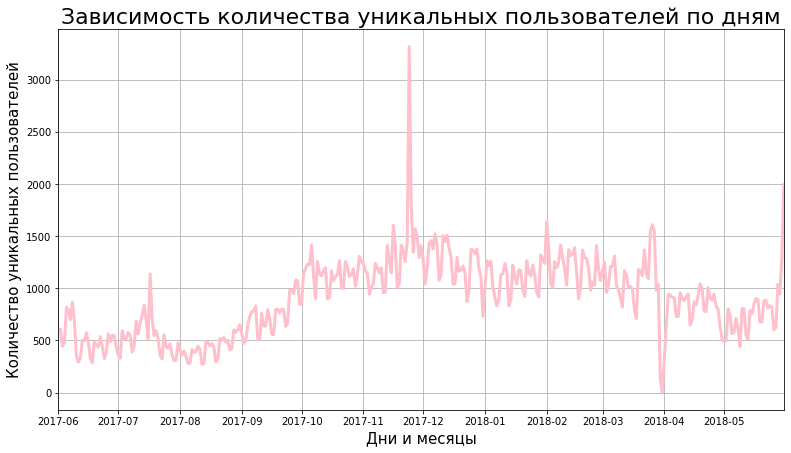

In [12]:
dau.plot(grid = True, figsize = (13,7), linewidth=3, color='pink', legend = False)
plt.title('Зависимость количества уникальных пользователей по дням', fontsize=22)
plt.xlabel('Дни и месяцы', fontsize=15)
plt.ylabel('Количество уникальных пользователей', fontsize=15)
plt.show()

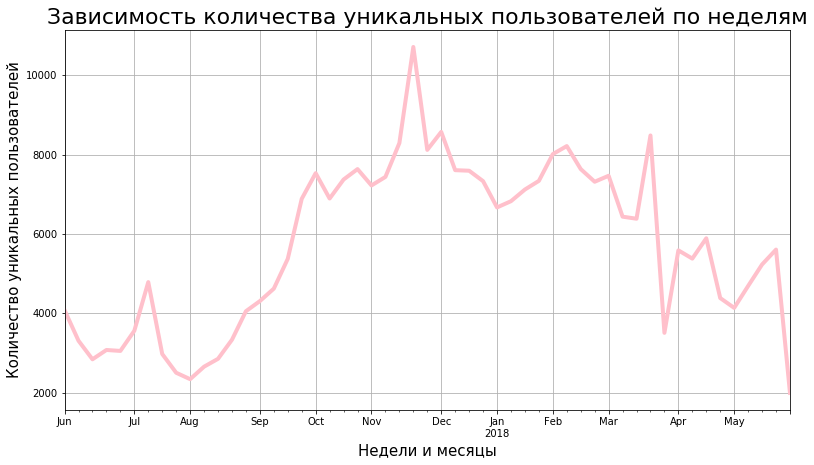

In [13]:
wau.plot(grid = True, figsize = (13,7), linewidth=4, color='pink', legend = False)
plt.title('Зависимость количества уникальных пользователей по неделям', fontsize=22)
plt.xlabel('Недели и месяцы', fontsize=15)
plt.ylabel('Количество уникальных пользователей', fontsize=15)
plt.show()

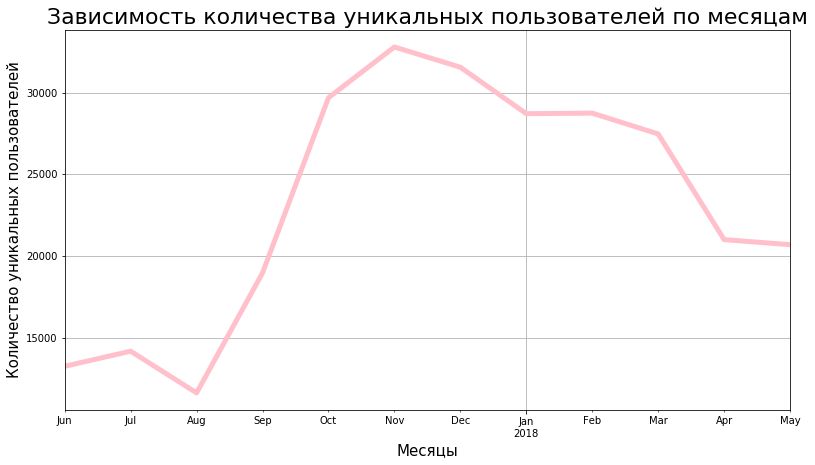

In [14]:
mau.plot(grid = True, figsize = (13,7), linewidth=5, color='pink', legend = False)
plt.title('Зависимость количества уникальных пользователей по месяцам', fontsize=22)
plt.xlabel('Месяцы', fontsize=15)
plt.ylabel('Количество уникальных пользователей', fontsize=15)
plt.show()

2.1.2 Определим, сколько раз за день пользователи в среднем заходят на сайт. Построим график, отражающий изменения метрики во времени.

In [15]:
count_visits_day = visits.groupby('visits_day').agg({'uid': ['count', 'nunique']})
count_visits_day.columns = ['count_visits', 'nunique_uid']
count_visits_day['count_visits_day'] = count_visits_day['count_visits'] / count_visits_day['nunique_uid']
display(count_visits_day.mean())

count_visits        987.362637
nunique_uid         907.991758
count_visits_day      1.082170
dtype: float64

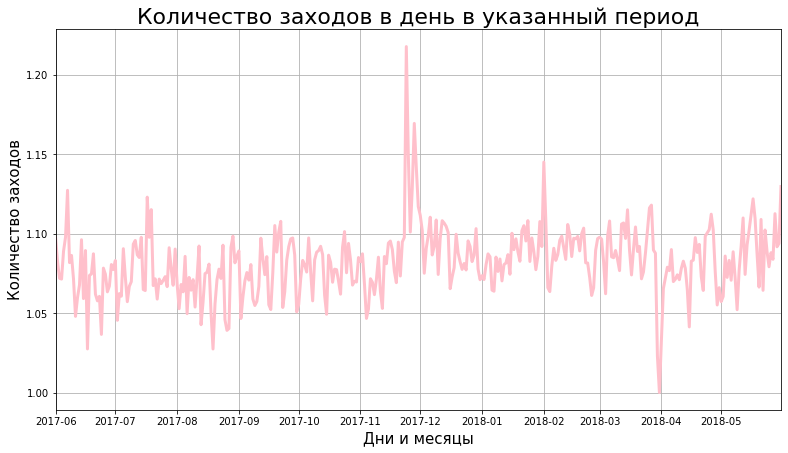

In [16]:
count_visits_day['count_visits_day'].plot(grid = True, figsize = (13,7), linewidth=3, color='pink', legend = False)
plt.title('Количество заходов в день в указанный период', fontsize=22)
plt.xlabel('Дни и месяцы', fontsize=15)
plt.ylabel('Количество заходов', fontsize=15)
plt.show()

2.1.3 Исследуем, сколько времени пользователи проводят на сайте. Узнаем продолжительность типичной пользовательской сессии за весь период. Чтобы выбрать подходящую среднюю меру, построим график распределения. Средняя продолжительность сессии показывает, сколько длится сессия пользователя в среднем.

In [17]:
visits.describe()

,source_id,uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


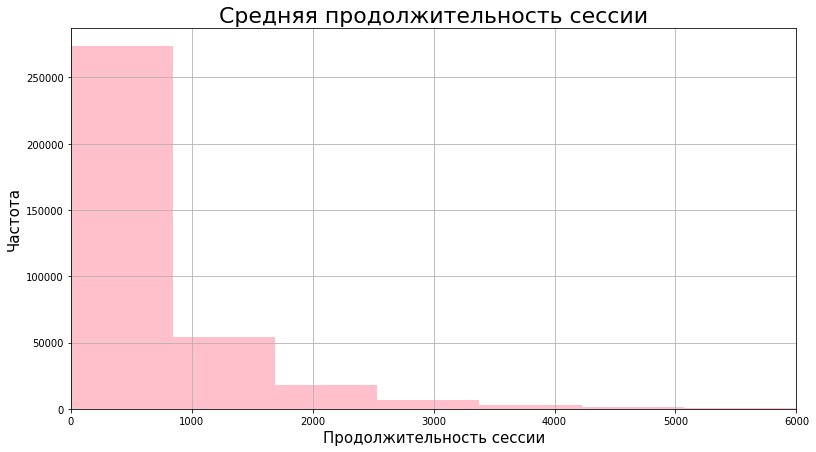

In [18]:
visits['duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['duration_sec'].hist(bins=100, figsize = (13,7), color='pink',) 
plt.title('Средняя продолжительность сессии', fontsize=22)
plt.xlabel('Продолжительность сессии', fontsize=15)
plt.ylabel('Частота', fontsize=15)
plt.xlim(0,6000)
plt.show()

Когда распределение близко к нормальному или нормальное — можно смотреть на среднюю или медиану. В нашем случае рассчитаем моду - значение в выборке, которое встречается чаще всего.

In [19]:
asl = visits['duration_sec'].mode()
asl

0    60
dtype: int64

2.1.4 Рассчитаем Retention Rate, применяя когортный анализ. Покажем изменения метрики во времени на графике. Найдем средний Retention Rate на второй месяц «жизни» когорт. Retention Rate показывает, сколько пользователей из когорты относительно их изначального числа вернулось в последующие периоды.

Найдем дату и время первой сессии каждого пользователя по конкретному отрезку времени. Создадим отдельные колонки с числом и месяцем первой сессии.

In [20]:
first_visits = visits.groupby('uid')['start_ts'].min().reset_index()
first_visits.columns = ['uid', 'first_start_ts']

In [21]:
first_visits['first_visits_day'] = first_visits['first_start_ts'].dt.date
first_visits['first_visits_month'] = first_visits['first_start_ts'].astype('datetime64[M]')

In [22]:
vis = pd.merge(first_visits, visits, on='uid')

Посчитаем, сколько прошло времени между первой и каждой следующей сессией. 

In [23]:
vis['lifetime'] = ((vis['visits_month'] - vis['first_visits_month']) / np.timedelta64(1, 'M')).round().astype('int')
vis.head()

,uid,first_start_ts,first_visits_day,first_visits_month,device,end_ts,source_id,start_ts,visits_day,visits_week,visits_month,duration_sec,lifetime
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018-03-01,2018-03-01,2018-03-01,360,0
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018-02-06,2018-02-01,2018-02-01,120,0
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017-06-07,2017-06-01,2017-06-01,60,0
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018-03-11,2018-03-08,2018-03-01,360,6
4,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,1080,0


In [24]:
cohorts = vis.groupby(['first_visits_month','lifetime']).agg({'uid':'nunique'}).reset_index()

Найдём исходное количество пользователей в когорте, возьмем их число на нулевой месяц, затем объединим данные по когортам с исходным количеством пользователей в когорте и рассчитаем Retention Rate.

In [25]:
initial_users_count = cohorts[cohorts['lifetime'] == 0][['first_visits_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 

In [26]:
cohorts = cohorts.merge(initial_users_count,on='first_visits_month') 
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users'] 
cohorts = cohorts.query('lifetime != 0')
cohorts.head()

,first_visits_month,lifetime,uid,cohort_users,retention
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557
5,2017-06-01,5,947,13259,0.071423


In [27]:
retention = cohorts.pivot_table(
    index='first_visits_month',
    columns='lifetime',
    values='retention',
    aggfunc='sum',
)
retention.fillna('')

lifetime,1,2,3,4,5,6,7,8,9,10,11
first_visits_month,,,,,,,,,,,
2017-06-01,0.078664,0.0537748,0.0613923,0.0685572,0.0714232,0.0610152,0.0577721,0.0523418,0.0508334,0.0406516,0.0449506
2017-07-01,0.056088,0.0512938,0.0561644,0.0582192,0.0481735,0.0453577,0.0457382,0.0388128,0.0286149,0.0274734,
2017-08-01,0.076908,0.0628622,0.062764,0.0500933,0.0440035,0.0363422,0.0394853,0.0278951,0.0260289,,
2017-09-01,0.085489,0.069205,0.0507064,0.0393918,0.0378352,0.0358597,0.0241858,0.0228089,,,
2017-10-01,0.078608,0.0522385,0.0389575,0.0342611,0.0322208,0.0213651,0.0203642,,,,
2017-11-01,0.078281,0.0441133,0.0386817,0.0337272,0.0234146,0.0217998,,,,,
2017-12-01,0.055802,0.0379927,0.0311065,0.0202628,0.0190359,,,,,,
2018-01-01,0.059715,0.0393388,0.0249735,0.020244,,,,,,,
2018-02-01,0.057080,0.0254539,0.0200928,,,,,,,,


In [28]:
retention[1].mean()

0.06516659710392834

Создадим тепловую карту.

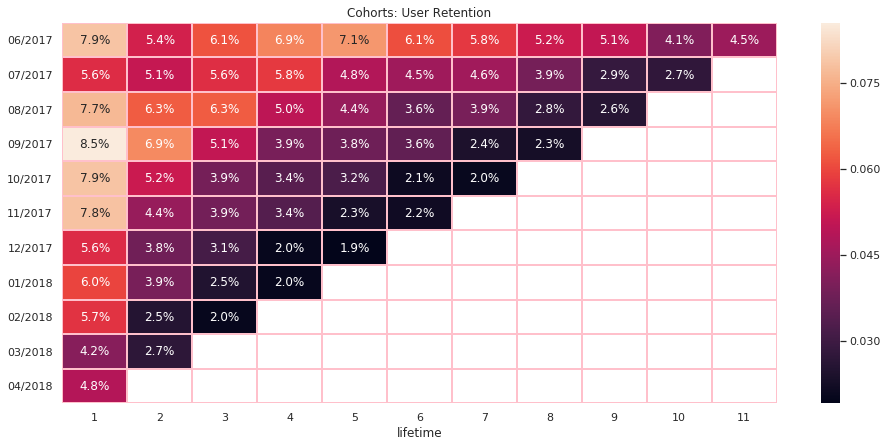

In [29]:
sns.set(style='white')
plt.figure(figsize=(16, 7))
retention.index = retention.index.strftime("%m/%Y")
plt.title('Cohorts: User Retention')
sns.heatmap(retention, annot=True, fmt='0.1%', linewidths=1, linecolor='pink');

#### Вывод

- Среднее значение DAU за указанный период равно 907.991758; WAU - 5724.415094; MAU - 23228.416667. На графиках видны изменения метрик во времени. Так, все три графика говорят о всплеске активности уникальных пользователей сервиса в ноябре 2017 года. Если обратиться к открытым источникам, то становится понятным, в этом месяце проводилась акция "черная пятница", поэтому пользователи активнее всего скупали билеты. Спад наблюдается в летние месяцы 2017 года, а также к концу мая 2018 (дальше данных нет). Во-первых, лето - традиционный период отпусков, во-вторых, еще не начался театральный сезон, открытие которого поспособствует росту активности пользователей в сентябре и октябре 2017 года. Чем обоснован спад активности в последние две недели апреля 2018 года - непонятно, возможно, это произошло из-за низкой маркетинговой активности, или повлияли предстоящие майские праздники.

- График, отражающий среднее число заходов на сайт в день, подтверждает наши выводы. 

- На графике видно, что чаще всего, пользователи проводят на сайте около 15 минут. Мода показывает, что в выборке чаще всего встречается значение 60 секунд, вряд ли за это время можно успеть что-то купить. Необходимо проверить, что мешает пользователю.

- Можно отметить, что в целом, когорты ведут себя одинаково. Во втором месяце во всех когортах вернулось меньше пользователей. Средний Retention Rate на второй месяц «жизни» когорт - 6.5%. Retention Rate показывает, сколько пользователей из когорты относительно их изначального числа вернулось в последующие периоды. Сказать, что у нас низкий Retention и это критически плохо - нельзя, так как это обусловлено спецификой сервиса. Сюда люди заходят по необходимости, не все люди покупают билеты в театр/на концерты на ежемесячной основе.

#### 2.2 Метрики электронной коммерции


2.2.1 Исследуем, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки.

In [30]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Добавим столбцы с днем и месяцем, а затем выясним дату первого заказа для каждого пользователя.

In [31]:
orders['orders_day'] = orders['buy_ts'].dt.date
orders['orders_month'] = orders['buy_ts'].astype('datetime64[M]')

In [32]:
first_orders = orders.groupby('uid')['orders_day'].min().reset_index()
first_orders.columns = ['uid', 'first_orders_day']
first_orders['first_orders_month'] = first_orders['first_orders_day'].astype('datetime64[M]')                                   
first_orders.head()

,uid,first_orders_day,first_orders_month
0,313578113262317,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11,2017-10-01
3,2464366381792757,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24,2017-11-01


Соединим две таблицы: с датой первого визита и с датой первого заказа.

In [33]:
buy = pd.merge(first_visits, first_orders, on='uid' )
buy.head()

,uid,first_start_ts,first_visits_day,first_visits_month,first_orders_day,first_orders_month
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11,2017-10-01
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24,2017-11-01


In [34]:
buy['first_visits_day'] = pd.to_datetime(buy['first_visits_day'])
buy['first_orders_day'] = pd.to_datetime(buy['first_orders_day'])

In [35]:
buy['days_to_first_purchase'] = (
    (buy['first_orders_day'] - buy['first_start_ts']) / np.timedelta64(1, 'D')
).astype('int')
buy.head()

,uid,first_start_ts,first_visits_day,first_visits_month,first_orders_day,first_orders_month,days_to_first_purchase
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03,2018-01-01,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03,2017-06-01,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11,2017-10-01,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28,2018-01-01,0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24,2017-11-01,0


In [36]:
buy.describe() 

,uid,days_to_first_purchase
count,3.652300e+04,36523.000000
mean,9.213152e+18,16.581716
std,5.324792e+18,46.827336
min,3.135781e+14,0.000000
25%,4.615081e+18,0.000000
50%,9.245161e+18,0.000000
75%,1.383709e+19,1.000000
max,1.844617e+19,362.000000


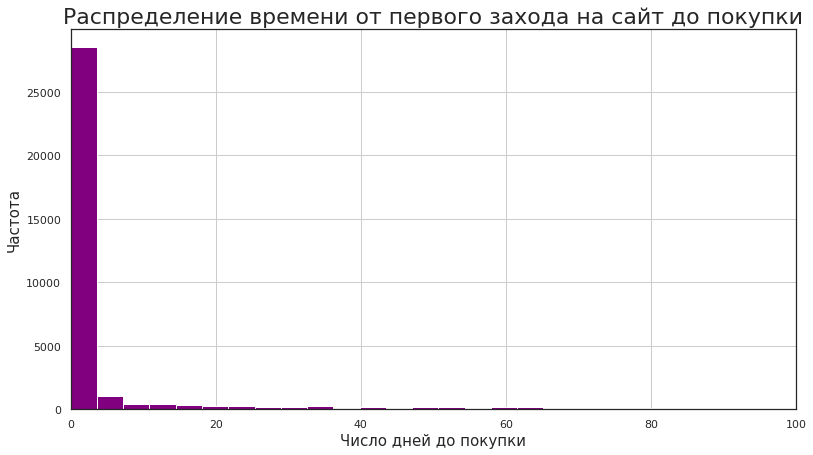

In [37]:
buy['days_to_first_purchase'].hist(bins=100, figsize = (13,7), color='purple',) 
plt.title('Распределение времени от первого захода на сайт до покупки', fontsize=22)
plt.xlabel('Число дней до покупки', fontsize=15)
plt.ylabel('Частота', fontsize=15)
plt.xlim(0,100)
plt.show()

2.2.2 Применяя когортный анализ рассчитаем среднее количество покупок на одного покупателя за 6 месяцев.

Определим размер когорты.

In [38]:
cohort_sizes = first_orders.groupby('first_orders_month').agg({'uid':'nunique'}).reset_index()
cohort_sizes.columns = ['first_orders_month', 'n_buyer']
cohort_sizes

,first_orders_month,n_buyer
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [39]:
orders_new = pd.merge(orders, first_orders, on='uid')
orders_new.head()

,buy_ts,revenue,uid,orders_day,orders_month,first_orders_day,first_orders_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01


Создадим переменную, в которой сохраним количество покупок за шесть месяцев.

In [40]:
orders_six_months = orders_new.groupby(
    ['first_orders_month']
).agg({'revenue': 'count'}).reset_index()
orders_six_months = orders_six_months.query('first_orders_month <= "2017-11-01"')
orders_six_months

,first_orders_month,revenue
0,2017-06-01,4438
1,2017-07-01,2910
2,2017-08-01,2188
3,2017-09-01,3878
4,2017-10-01,6005
5,2017-11-01,5900


In [41]:
number_orders = pd.merge(cohort_sizes, orders_six_months, on='first_orders_month')
number_orders

,first_orders_month,n_buyer,revenue
0,2017-06-01,2023,4438
1,2017-07-01,1923,2910
2,2017-08-01,1370,2188
3,2017-09-01,2581,3878
4,2017-10-01,4340,6005
5,2017-11-01,4081,5900


In [42]:
(number_orders['revenue'].sum()) / (number_orders['n_buyer'].sum())

1.5515994607182253

2.2.3 Рассчитаем средний чек, применяя группировку по времени совершения покупки. Когортный анализ не подходит — он может исказить расчеты. Построим график, отражающий изменения метрики во времени.

In [43]:
average_check = orders_new.groupby('orders_day')['revenue'].agg(['count', 'sum'])
average_check['revenue_average'] = average_check['sum'] / average_check['count']
average_check.head()

,count,sum,revenue_average
orders_day,,,
2017-06-01,96,389.46,4.056875
2017-06-02,111,324.11,2.919910
2017-06-03,67,166.48,2.484776
2017-06-04,66,195.21,2.957727
2017-06-05,161,441.49,2.742174


Построим график динамики среднего чека.

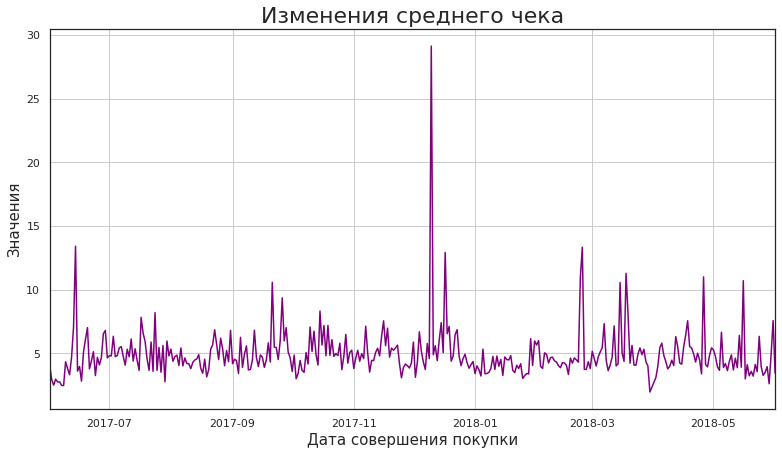

In [44]:
average_check['revenue_average'].plot(grid = True, figsize = (13,7),color='purple')
plt.title('Изменения среднего чека', fontsize=22)                                      
plt.xlabel('Дата совершения покупки', fontsize=15)
plt.ylabel('Значения', fontsize=15)
plt.show() 


2.2.4 Выясним, как меняется LTV на покупателя по когортам. Рассчитаем средний LTV по когортам за 6 месяцев; в расчет включим когорты, «прожившие» не менее 6 месяцев.  Отразим изменения метрики во времени на графике.

LTV считают не из выручки, а из валовой прибыли. Маржинальность сервиса — 100%. Значит, валовая прибыль, будет соответствовать выручки.

In [45]:
cohort_orders = orders_new.groupby(
    ['first_orders_month', 'orders_month']
).agg({'revenue': 'sum'}).reset_index()
cohort_orders.head()

,first_orders_month,orders_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [46]:
report = pd.merge(cohort_sizes, cohort_orders, on='first_orders_month')

Определим возраст когорты.

In [47]:
report['age'] = ((report['orders_month'] - report['first_orders_month']) / np.timedelta64(1, 'M')).round().astype('int')

Рассчитаем LTV, помним, что это накопительная метрика. Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте. Для наглядности визуализируем когорты в виде сводной таблицы.

In [48]:
report['ltv'] = report['revenue'] / report['n_buyer']
report.head()

,first_orders_month,n_buyer,orders_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


In [49]:
ltv = report.pivot_table(
    index='first_orders_month',
    columns='age',
    values='ltv',
    aggfunc='sum',
).cumsum(axis=1)
ltv.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_orders_month,,,,,,,,,,,,
2017-06-01,4.724414,5.20974,5.64738,6.60205,7.62458,8.36008,9.31052,9.89212,10.4453,11.0511,11.6224,11.8792
2017-07-01,6.010218,6.34543,6.96896,7.32794,7.50473,7.66077,7.78098,7.9228,8.08404,8.23118,8.38685,
2017-08-01,5.276518,5.74851,6.20699,6.59827,7.09232,7.37586,7.58653,7.99153,8.28374,8.47172,,
2017-09-01,5.644529,6.76212,7.28305,11.2588,11.6594,12.3065,13.0081,13.2512,13.4352,,,
2017-10-01,5.003733,5.5395,5.73089,5.88803,6.03959,6.15996,6.24477,6.36024,,,,
2017-11-01,5.154683,5.55392,5.75347,6.07842,6.22644,6.28032,6.39524,,,,,
2017-12-01,4.738191,4.99856,5.92366,6.98894,7.30187,7.63991,,,,,,
2018-01-01,4.135636,4.43039,4.73468,4.87745,4.94015,,,,,,,
2018-02-01,4.156987,4.43526,4.51378,4.58792,,,,,,,,


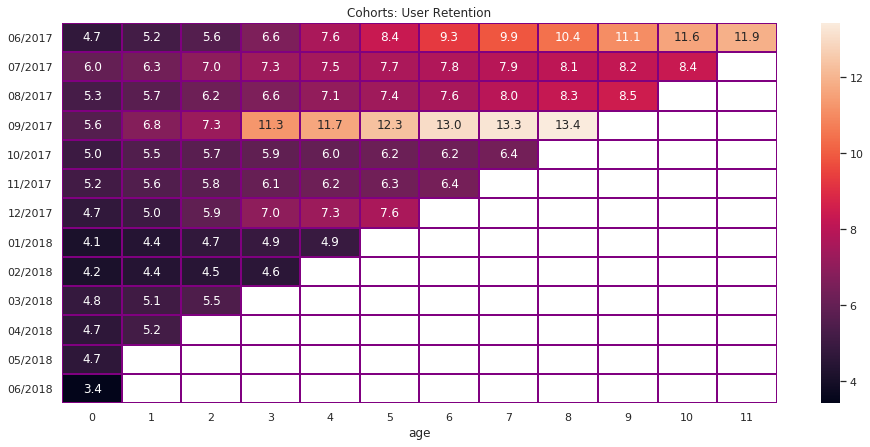

In [50]:
sns.set(style='white')
plt.figure(figsize=(16, 7))
ltv.index = ltv.index.strftime("%m/%Y")
plt.title('Cohorts: User Retention')
sns.heatmap(ltv, annot=True, fmt='0.1f', linewidths=1, linecolor='purple');

Найдем средний LTV по когортам за 6 месяцев. Отразим изменения метрики во времени на графике. В отчет включим когорты, прожившие не менее 6 месяцев.

In [51]:
ltv[5].mean()

7.969052630207336

In [52]:
ltv_six_months = ltv.iloc[0:6]
ltv_six_months.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
06/2017,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.89212,10.4453,11.0511,11.6224,11.8792
07/2017,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.9228,8.08404,8.23118,8.38685,
08/2017,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.99153,8.28374,8.47172,,
09/2017,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.2512,13.4352,,,
10/2017,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.36024,,,,
11/2017,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,,,,,


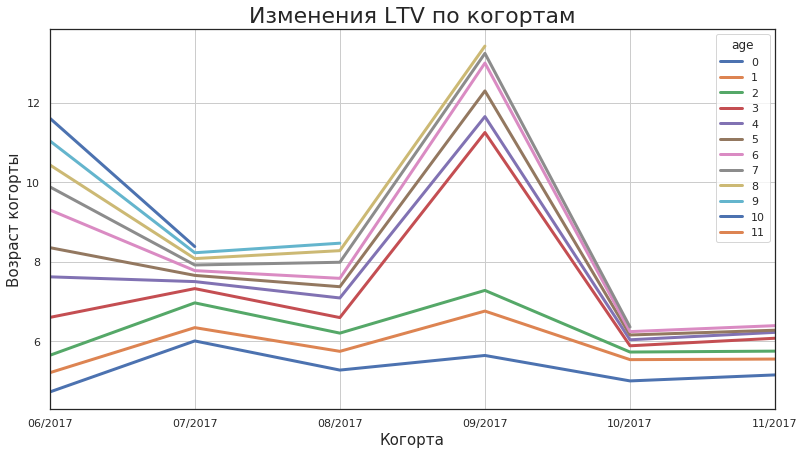

In [53]:
ltv_six_months.plot(grid = True, figsize = (13,7), linewidth=3)
plt.title('Изменения LTV по когортам', fontsize=22)                           
plt.xlabel('Когорта', fontsize=15)
plt.ylabel('Возраст когорты', fontsize=15)
plt.show()

#### Вывод

- В своем большинстве, пользователи, впервые зашедшие на сайт, делают покупки в тот же день. Этот вывод подтверждает график "Распределение времени от первого захода на сайт до покупки".
- Также расчеты показали, что за шесть месяцев на одного покупателя приходится 1.5 покупки.
- Судя по графику, отражающему изменения среднего чека во времени, среднее колеблется в районе 5 у.е., максимальное значение – 30 у.е., это выброс, полученный из-за "черной пятницы", что подтверждается графиками о пользовательской активности.
- Средний LTV по когортам за 6 месяцев составил 7.97. На тепловой карте видим, что с возрастом когорты итоговая сумма, которую один клиент приносит в среднем со всех своих покупок (LTV) увеличивается. Интересно, что больше остальных рост показывала сентябрьская когорта. Меньший - когорты, которые были образованны в 2018 году, но и срок жизни их пока небольшой, чтобы делать негативный прогноз. На графике "Изменения LTV по когортам" можно увидеть, что в первый месяц жизни когорты ведут себя практически одинаково. Рост LTV наблюдается на четвертый месяц жизни когорт, а значит пользователи начинают возвращаться на сервис.

#### 2.3 Маркетинговые метрики

Посчитаем и отобразим на графиках, как маркетинговые метрики различаются по рекламным источникам.
Один и тот же пользователь мог заходить на сайт из нескольких источников, поэтому важно определить первый источник для каждого и учитывать это в расчетах.

2.3.1 Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам. Визуализируем изменения метрик во времени.

In [54]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [55]:
costs['costs_day'] = costs['dt'].dt.date
costs['costs_month'] = costs['dt'].astype('datetime64[M]')

Посмотрим уникальные источники трафика, а затем отобразим затраты на маркетинг во времени на графике.

In [56]:
costs['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10])

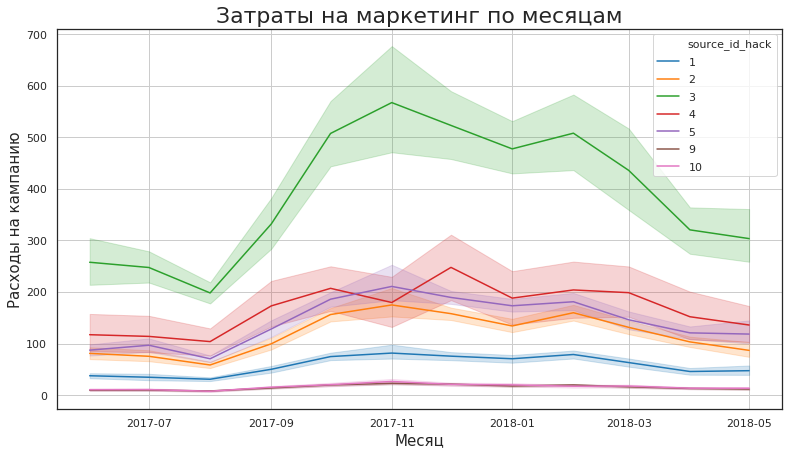

In [57]:
costs['source_id_hack'] = ["$%s$" % x for x in costs['source_id']]
plt.figure(figsize=(13,7))
sns.lineplot(data=costs, x='costs_month', y='costs', hue='source_id_hack', palette='tab10')
plt.title('Затраты на маркетинг по месяцам', fontsize=22)
plt.xlabel('Месяц', fontsize=15)
plt.ylabel('Расходы на кампанию', fontsize=15)
plt.grid()
plt.show()

In [58]:
marketing_costs = costs.groupby('source_id')['costs'].sum()
marketing_costs

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

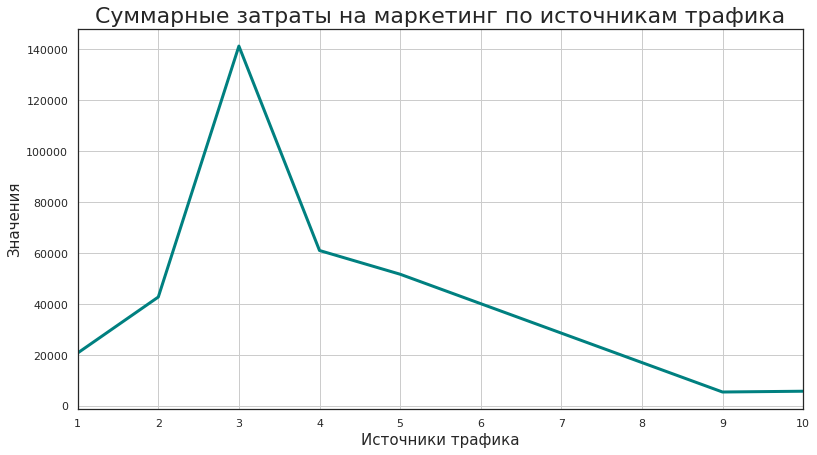

In [59]:
marketing_costs.plot(grid = True, figsize = (13,7),linewidth=3, color='teal')
plt.title('Суммарные затраты на маркетинг по источникам трафика', fontsize=22)                                      
plt.xlabel('Источники трафика', fontsize=15)
plt.ylabel('Значения', fontsize=15)
plt.show() 

In [60]:
round(sum(marketing_costs), 2)

329131.62

2.3.2 Рассчитаем средний CAC на одного покупателя для всего проекта и для каждого источника трафика. Отразим изменения метрик на графиках. 

In [61]:
costs_month = costs.groupby(['costs_month'])['costs'].sum().reset_index()

In [62]:
cac = pd.merge(cohort_sizes, costs_month, left_on='first_orders_month', right_on='costs_month')
cac

,first_orders_month,n_buyer,costs_month,costs
0,2017-06-01,2023,2017-06-01,18015.00
1,2017-07-01,1923,2017-07-01,18240.59
2,2017-08-01,1370,2017-08-01,14790.54
3,2017-09-01,2581,2017-09-01,24368.91
4,2017-10-01,4340,2017-10-01,36322.88
5,2017-11-01,4081,2017-11-01,37907.88
6,2017-12-01,4383,2017-12-01,38315.35
7,2018-01-01,3373,2018-01-01,33518.52
8,2018-02-01,3651,2018-02-01,32723.03
9,2018-03-01,3533,2018-03-01,30415.27


Определим САС для каждой когорты. Поделим расходы на кампанию на уникальных пользователей каждой когорты.

In [63]:
cac['cac'] = cac['costs'] / cac['n_buyer']
cac

,first_orders_month,n_buyer,costs_month,costs,cac
0,2017-06-01,2023,2017-06-01,18015.00,8.905091
1,2017-07-01,1923,2017-07-01,18240.59,9.485486
2,2017-08-01,1370,2017-08-01,14790.54,10.796015
3,2017-09-01,2581,2017-09-01,24368.91,9.441654
4,2017-10-01,4340,2017-10-01,36322.88,8.369327
5,2017-11-01,4081,2017-11-01,37907.88,9.288870
6,2017-12-01,4383,2017-12-01,38315.35,8.741809
7,2018-01-01,3373,2018-01-01,33518.52,9.937302
8,2018-02-01,3651,2018-02-01,32723.03,8.962758
9,2018-03-01,3533,2018-03-01,30415.27,8.608907


Посмотрим изменения САС на графике по когортам.

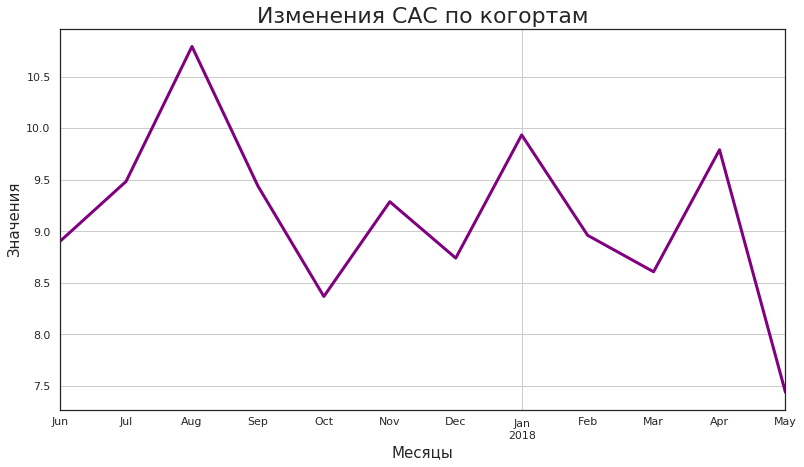

In [64]:
cac.plot(x='costs_month', y='cac', figsize = (13,7),color='purple', linewidth=3, legend = False)
plt.title('Изменения CAC по когортам', fontsize=22)                                      
plt.xlabel('Месяцы', fontsize=15)
plt.ylabel('Значения', fontsize=15)
plt.grid()
plt.show()

In [65]:
cac.mean()

n_buyer     3043.500000
costs      27427.635000
cac            9.147357
dtype: float64

Найдем CAC для каждого источника трафика. Для этого найдем первый рекламный источник, из которого пришел каждый пользователь.

In [66]:
users = visits.sort_values('start_ts').groupby('uid').first()
users.head()

,device,end_ts,source_id,start_ts,visits_day,visits_week,visits_month,duration_sec
uid,,,,,,,,
11863502262781,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018-03-01,2018-03-01,2018-03-01,360
49537067089222,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018-02-06,2018-02-01,2018-02-01,120
297729379853735,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017-06-07,2017-06-01,2017-06-01,60
313578113262317,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,1080
325320750514679,desktop,2017-09-30 14:38:00,5,2017-09-30 14:29:00,2017-09-30,2017-09-28,2017-09-01,540


In [67]:
client = pd.merge(orders_new, users[['source_id']], on='uid', how='left')
client.head()

,buy_ts,revenue,uid,orders_day,orders_month,first_orders_day,first_orders_month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01,3


Сгруппируем данные, чтобы получить источник и количество людей, которые пришли из этого источника трафика и совершили в этот месяц первую покупку.

In [68]:
cohort_source_size = client.groupby(
    ['first_orders_month', 'source_id']
).agg({'uid':'nunique'}).reset_index()
cohort_source_size.columns = ['first_orders_month', 'source_id', 'n_buyers']
cohort_source_size.head()

,first_orders_month,source_id,n_buyers
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384


In [69]:
costs_marketing = costs.groupby(
    ['costs_month', 'source_id']
).agg({'costs':'sum'}).reset_index()
costs_marketing.columns = ['costs_month', 'source_id', 'costs_sum']
costs_marketing.head()

,costs_month,source_id,costs_sum
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


In [70]:
costs_source = pd.merge(costs_marketing, cohort_source_size, left_on=['costs_month', 'source_id'], right_on=['first_orders_month', 'source_id'])
costs_source.head()

,costs_month,source_id,costs_sum,first_orders_month,n_buyers
0,2017-06-01,1,1125.61,2017-06-01,190
1,2017-06-01,2,2427.38,2017-06-01,235
2,2017-06-01,3,7731.65,2017-06-01,638
3,2017-06-01,4,3514.80,2017-06-01,413
4,2017-06-01,5,2616.12,2017-06-01,384


In [71]:
costs_source['cac'] = round(costs_source['costs_sum'] / costs_source['n_buyers'], 2)
costs_source.head()

,costs_month,source_id,costs_sum,first_orders_month,n_buyers,cac
0,2017-06-01,1,1125.61,2017-06-01,190,5.92
1,2017-06-01,2,2427.38,2017-06-01,235,10.33
2,2017-06-01,3,7731.65,2017-06-01,638,12.12
3,2017-06-01,4,3514.80,2017-06-01,413,8.51
4,2017-06-01,5,2616.12,2017-06-01,384,6.81


In [72]:
source_cac = costs_source.pivot_table(
    index=['first_orders_month'], columns='source_id', values='cac', aggfunc='mean'
)

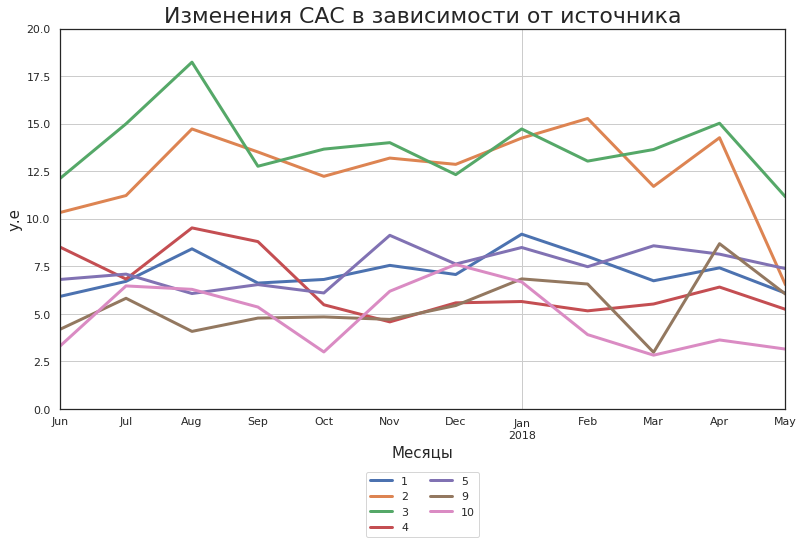

In [73]:
source_cac.plot(figsize = (13,7), linewidth=3)
plt.ylim(0, 20)
plt.title('Изменения CAC в зависимости от источника', fontsize=22)                                      
plt.xlabel('Месяцы', fontsize=15)
plt.ylabel('у.е', fontsize=15)
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.25), shadow=False, ncol=2)
plt.grid()
plt.show()

In [74]:
cac_source = costs_source.groupby(['source_id'])['cac'].mean().reset_index()
cac_source

,source_id,cac
0,1,7.213333
1,2,12.505000
2,3,13.803333
3,4,6.440000
4,5,7.452500
5,9,5.415000
6,10,4.868333


2.3.3 Рассчитаем ROMI по когортам в разрезе источников. Сравним окупаемость за одинаковые периоды жизни когорт. Клиенты, пришедшие из разных источников, могут иметь разный LTV. Построим графики, отражающие изменения метрик во времени.

Посчитаем LTV в разрезе источников. 

In [76]:
source_cohort = client.groupby(
    ['first_orders_month', 'orders_month', 'source_id']
).agg({'revenue':'sum'}).reset_index()

In [77]:
source_report = pd.merge(cohort_source_size, source_cohort, on=['first_orders_month', 'source_id'])

In [78]:
source_report['age'] = (
    (source_report['orders_month'] - source_report['first_orders_month']) / np.timedelta64(1, 'M')
).round().astype('int')

In [79]:
source_report['ltv'] = source_report['revenue'] / source_report['n_buyers']

In [80]:
source_ltv = source_report.pivot_table(
    index=['first_orders_month', 'source_id'], columns='age', values='ltv', aggfunc='sum'
).cumsum(axis=1)

Посчитаем общий LTV для каждого источника.

In [81]:
ltv_source = source_ltv.reset_index().groupby(['source_id'])[5].mean().reset_index()
ltv_source.columns = ['source_id', 'ltv_6m']
ltv_source

,source_id,ltv_6m
0,1,12.011587
1,2,15.491555
2,3,5.730149
3,4,6.032379
4,5,9.345449
5,7,NaN
6,9,5.815051
7,10,3.930334


Построим тепловую карту в разбивке по когортам.

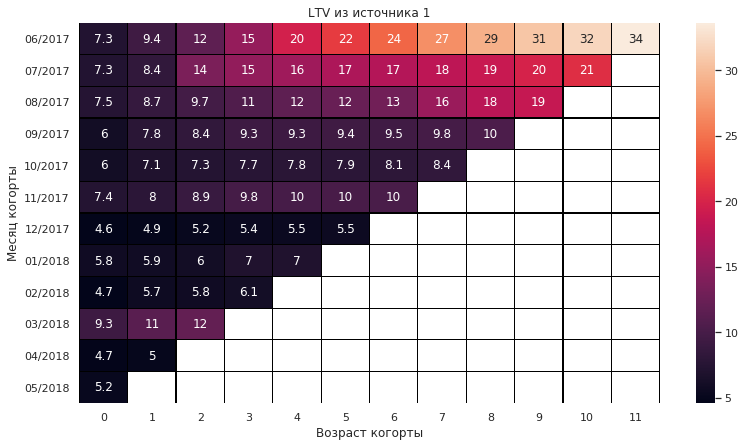

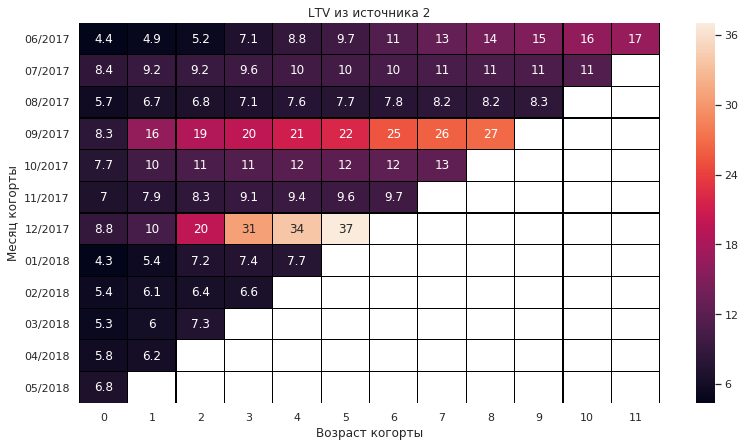

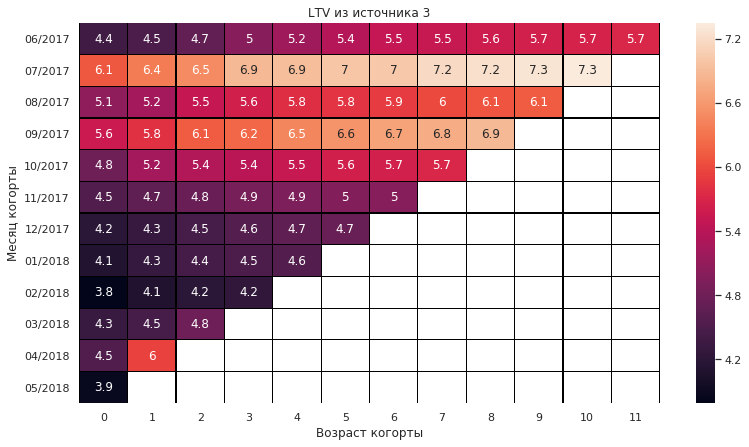

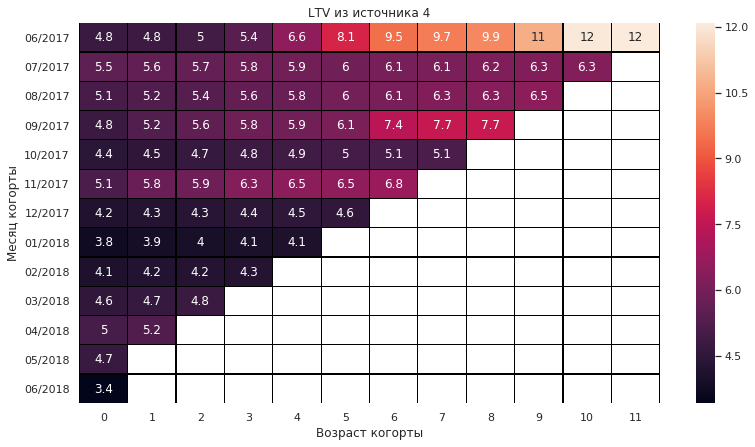

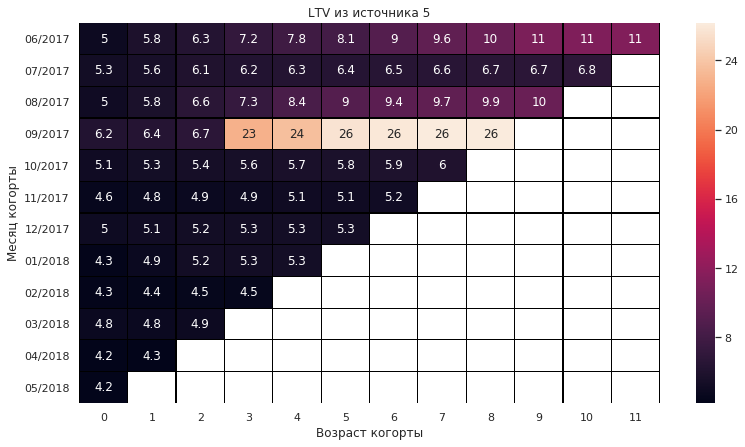

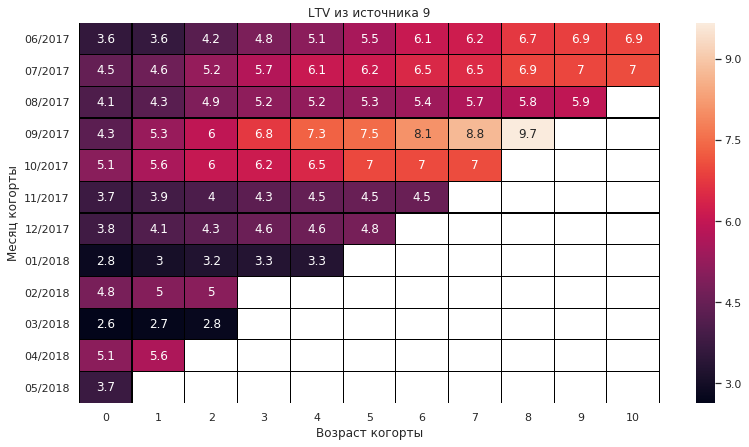

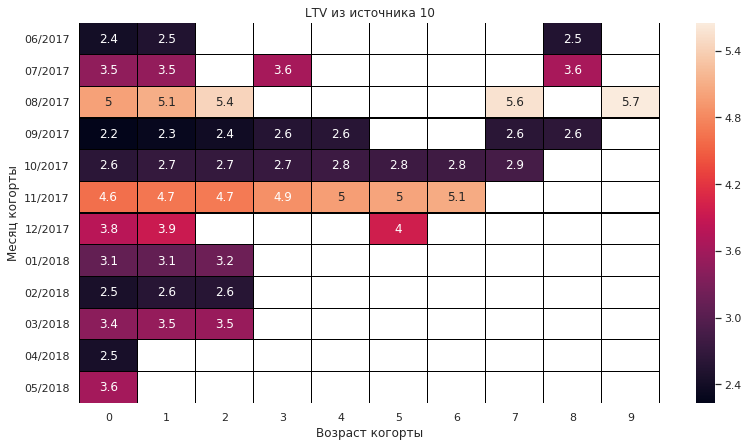

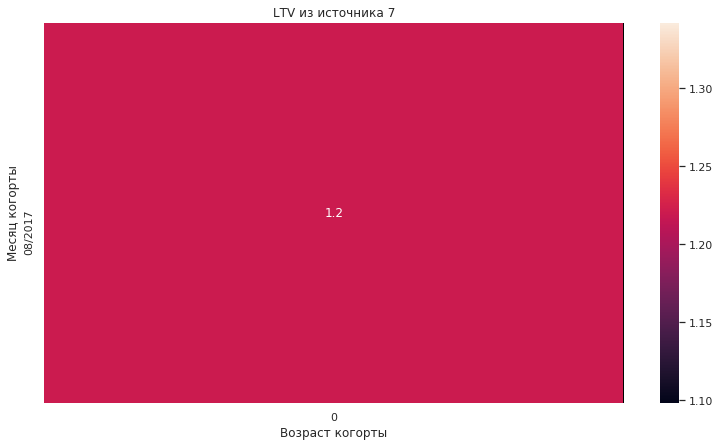

In [82]:
dt = source_report['source_id'].unique()

for dt in dt:
    plt.figure(figsize=(13, 7))
    ltv_by_source = (source_report[source_report['source_id'] == dt]
          .pivot_table(index='first_orders_month', columns='age', values='ltv', aggfunc='mean'))
    ltv_by_source.index = ltv_by_source.index.strftime("%m/%Y")
    
    sns.heatmap(ltv_by_source.cumsum(axis=1).round(2), annot=True, linewidths=0.2, linecolor='black')
    plt.title('LTV из источника {}'.format(dt))
    plt.xlabel('Возраст когорты')
    plt.ylabel('Месяц когорты')

In [83]:
romi = pd.merge(cac_source, ltv_source, on='source_id')

Рассчитаем ROMI: поделим LTV на CAC.
Чтобы посчитать накопительный ROMI, вызовем метод cumsum(). 

In [84]:
romi['romi'] = romi['ltv_6m'] / romi['cac']
romi

,source_id,cac,ltv_6m,romi
0,1,7.213333,12.011587,1.665192
1,2,12.505000,15.491555,1.238829
2,3,13.803333,5.730149,0.415128
3,4,6.440000,6.032379,0.936705
4,5,7.452500,9.345449,1.254002
5,9,5.415000,5.815051,1.073878
6,10,4.868333,3.930334,0.807326


Из таблицы costs сгруппируем расходы по месяцу расходов и рекламному источнику, посчитаем сумму расходов в каждой из групп.

In [85]:
costs_for_cac = (costs
                 .groupby(['costs_month', 'source_id'])
                 .agg({'costs': 'sum'})
                 .reset_index())

In [86]:
romi_report = costs_for_cac.merge(
    source_report, left_on=['costs_month', 'source_id'], right_on=['first_orders_month', 'source_id']
)

In [87]:
romi_report['cac'] = romi_report['costs'] / romi_report['n_buyers']
romi_report['romi'] = romi_report['ltv'] / romi_report['cac']
romi_report.head()

,costs_month,source_id,costs,first_orders_month,n_buyers,orders_month,revenue,age,ltv,cac,romi
0,2017-06-01,1,1125.61,2017-06-01,190,2017-06-01,1378.70,0,7.256316,5.924263,1.224847
1,2017-06-01,1,1125.61,2017-06-01,190,2017-07-01,414.98,1,2.184105,5.924263,0.368671
2,2017-06-01,1,1125.61,2017-06-01,190,2017-08-01,419.43,2,2.207526,5.924263,0.372625
3,2017-06-01,1,1125.61,2017-06-01,190,2017-09-01,714.24,3,3.759158,5.924263,0.634536
4,2017-06-01,1,1125.61,2017-06-01,190,2017-10-01,811.20,4,4.269474,5.924263,0.720676


Отобразим изменение ROMI во времени по каждому источнику трафика.

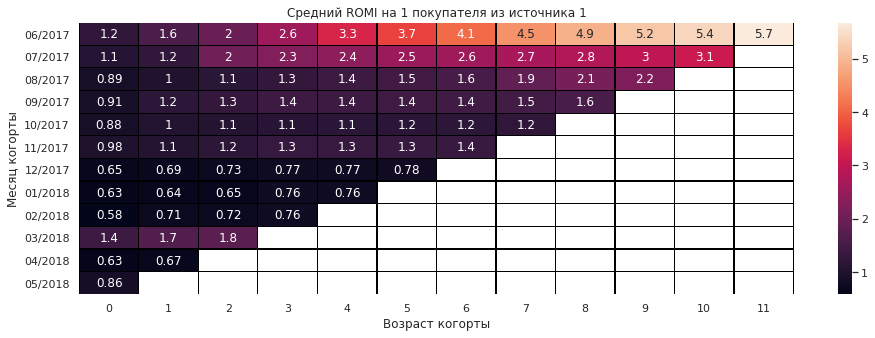

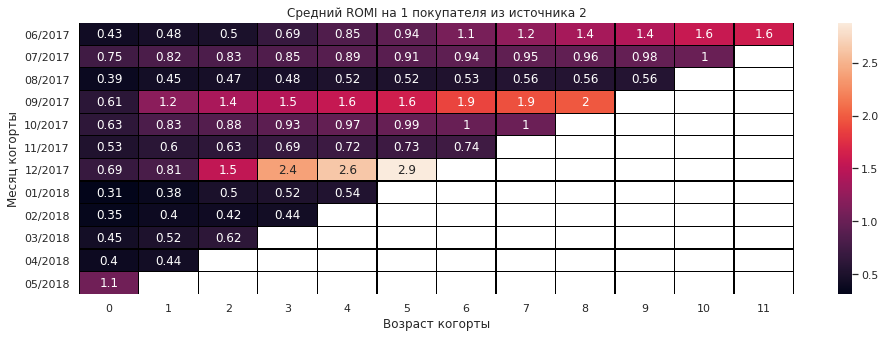

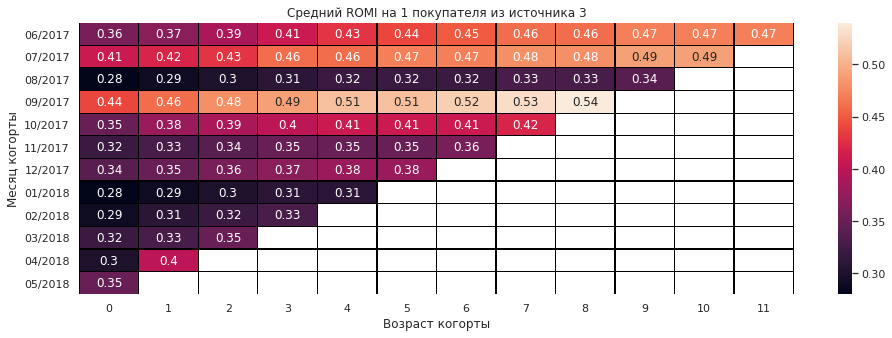

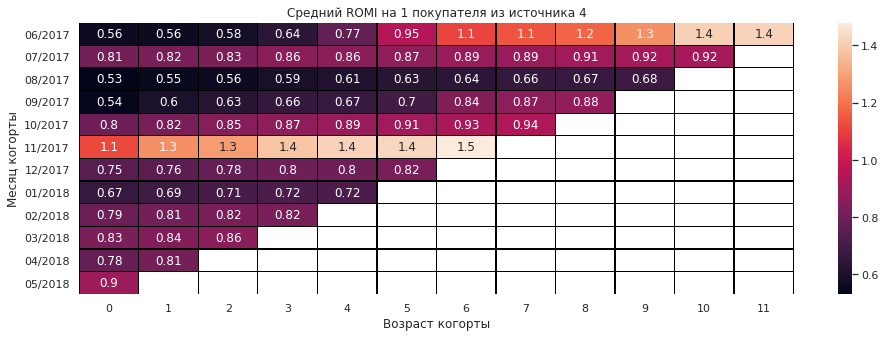

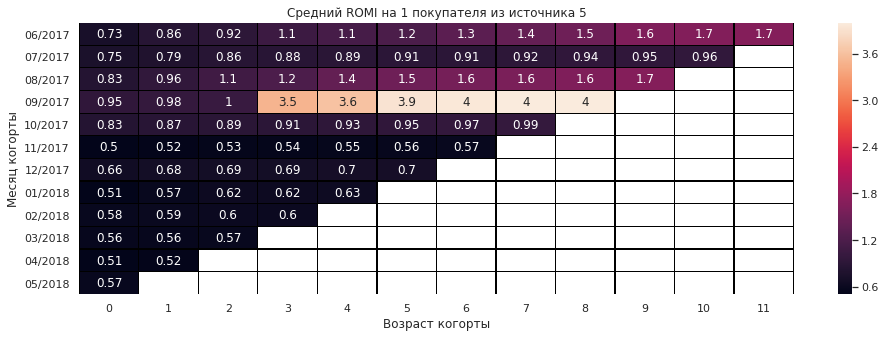

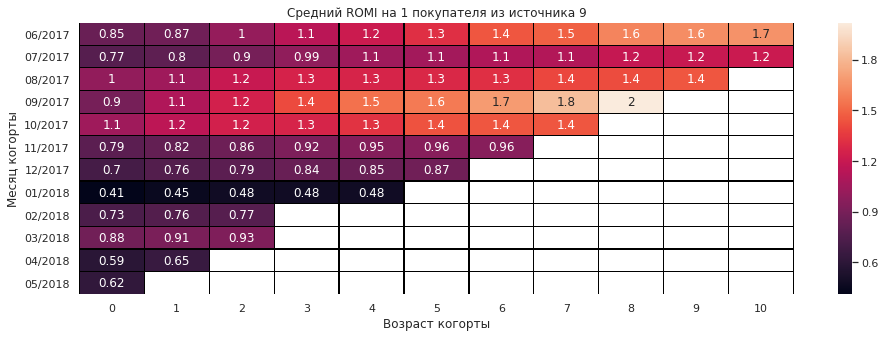

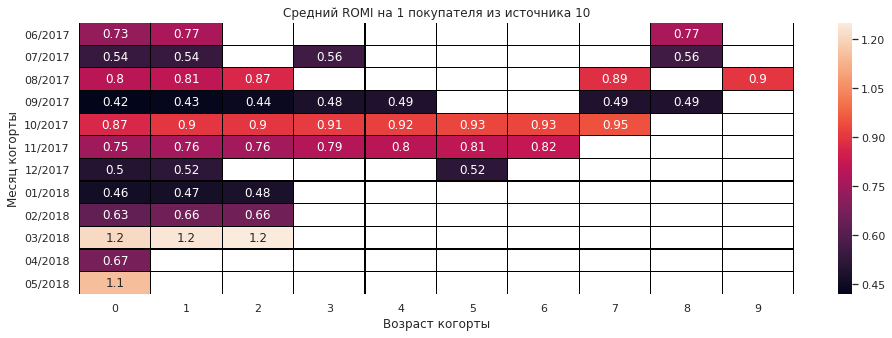

In [88]:
sources = romi_report['source_id'].unique()

for source in sources:
    plt.figure(figsize=(16, 5))
    
    romi_by_sources = (romi_report[romi_report['source_id'] == source]
              .pivot_table(index='first_orders_month', columns='age', values='romi', aggfunc='mean'))
    romi_by_sources.index = romi_by_sources.index.strftime("%m/%Y")
    
    sns.heatmap(romi_by_sources.cumsum(axis=1).round(2), annot=True, linewidths=0.2, linecolor='black')
    
    plt.title('Средний ROMI на 1 покупателя из источника {}'.format(source))
    plt.xlabel('Возраст когорты')
    plt.ylabel('Месяц когорты')

#### Вывод

- По суммарным затратам, самым дорогим является 3 источник трафика, меньше всего затрат приносят источники трафика 9 и 10. Это подтверждает график затрат на маркетинг по месяцам. Также на этом графике мы видим, что основные траты на трафик были сделаны с августа 2017 года, по апрель 2018. Также если посмотреть на два самых дорогих источника трафика, 3 и 4, то можно заметить, что в ноябре выросли затраты для 3 источника, тогда как для 4 - сократились. Значит маркетологи решили, что трафик 3 источника принесет, возможно, больше прибыли во время "черной пятницы". Противоположную ситуацию можно наблюдать в январе. 
- Средний CAC на одного покупателя для всего проекта 9,1. В разбивке по коготрам, мы видим, что CAC — стоимость привлечения клиента, т.е. сумма денег, во сколько обходится новый клиент компании. Начинает увеличиваться с августа и сокращается к маю. Мы уже отмечали, что активность пользователей сервиса сокращается к лету.
- САС по источникам трафика 1, 2, 5, 9 и 10 в разбивке по месяцам распределены оинаковом диапазоне у.е., а вот 3 и 4 источники трафика, распределены по месяцам неравномерно. Кроме того, затраты по ним растут одинаково, в разбивке по мецяцам. Стоимость трафика не всегда коррелирует с качеством привлечения покупателя. Есть дорогие и есть дешевые покупатели.
- Экономика одного покупателя сходится, LTV больше CAC, наши расчеты показывают, что в 3,4 и 10 источнике трафика больше САС. Больше всего LTV у источников трафика 1 и 2. Все когорты увеличивают LTV с возрастом, но значимые результаты, в большинстве, появляются на 5-6 месяц жизни когорты. Все когорты по источникам имеют окупаемость, либо близки к этому. Хуже всего себя показывает ROMI для 5 источника, одноко сентябрьская когорта показывала хорошие результаты уже с 4-го месяца жизни. Основные результаты когорты имеют к 3-4 месяцу жизни по всем источникам.

### Шаг 3. Сформулируем выводы и рекомендации

- 1. Маркетологам стоит делать упор на 3 и 9 источник трафика. В первом случае, несмотря на то, что суммарные затраты у него выше остальных, а метрика САС больше LTV, когорты становятся окупаемыми к 3-4 месяцам. Кроме того, это самый популярный источник трафика.  У источника 9 суммарные затраты были невелики, САС меньше LTV. Также у 9 источника все когорты или окупились, или близки к этому, об этом говорит ROMI уже на 3-4 месяц жизни.

- 2. После подсчета метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции, можно сделать следующие выводы:
    - Среднее значение DAU, WAU и MAU говорят о всплеске активности уникальных пользователей сервиса в ноябре 2017 года. Если обратиться к открытым источникам, то становится понятным, в этом месяце проводилась акция "черная пятница", поэтому пользователи активнее всего скупали билеты. Спад наблюдается в летние месяцы 2017 года, а также к концу мая 2018 (дальше данных нет). Во-первых, лето - традиционный период отпусков, во-вторых, еще не начался театральный сезон, открытие которого поспособствует росту активности пользователей в сентябре и октябре 2017 года. Спад активности в последние две недели апреля 2018 года возможно говорит о предстоящих майских праздниках и начала дачного, а не театрального сезона. Чаще всего, пользователи проводят на сайте около 15 минут. Можно отметить, что в целом, когорты ведут себя одинаково. Во втором месяце во всех когортах вернулось меньше пользователей. Средний Retention Rate на второй месяц «жизни» когорт - 6.5%. 

    - Пользователи, впервые зашедшие на сайт, делают покупки в тот же день, за редким исключением. Этот вывод подтверждает график "Распределение времени от первого захода на сайт до покупки". Также расчеты показали, что за шесть месяцев на одного покупателя приходится 1.5 покупки. Судя по графику, отражающему изменения среднего чека во времени, среднее колеблется в районе 5 у.е., максимальное значение – 30 у.е., это выброс, полученный из-за "черной пятницы", что подтверждается графиками о пользовательской активности. Средний LTV по когортам за 6 месяцев составил 7.97. На тепловой карте видим, что с возрастом когорты итоговая сумма, которую один клиент приносит в среднем со всех своих покупок (LTV) увеличивается. Интересно, что больше остальных рост показывала сентябрьская когорта. Меньший - когорты, которые были образованны в 2018 году, но и срок жизни их пока небольшой, чтобы делать негативный прогноз. На графике "Изменения LTV по когортам" можно увидеть, что в первый месяц жизни когорты ведут себя практически одинаково. Рост LTV наблюдается на четвертый месяц жизни когорт, а значит пользователи начинают возвращаться на сервис.

    - По суммарным затратам, самым дорогим является 3 источник трафика, меньше всего затрат приносят источники трафика 9 и 10. Это подтверждает график затрат на маркетинг по месяцам. Также на этом графике мы видим, что основные траты на трафик были сделаны с августа 2017 года, по апрель 2018. Также если посмотреть на два самых дорогих источника трафика, 3 и 4, то можно заметить, что в ноябре выросли затраты для 3 источника, тогда как для 4 - сократились. Значит маркетологи решили, что трафик 3 источника принесет, возможно, больше прибыли во время "черной пятницы". Противоположную ситуацию можно наблюдать в январе. Средний CAC на одного покупателя для всего проекта 9,1. В разбивке по коготрам, мы видим, что CAC — стоимость привлечения клиента, т.е. сумма денег, во сколько обходится новый клиент компании. Начинает увеличиваться с августа и сокращается к маю. Мы уже отмечали, что активность пользователей сервиса сокращается к лету. САС по источникам трафика 1, 2, 5, 9 и 10 в разбивке по месяцам распределены оинаковом диапазоне у.е., а вот 3 и 4 источники трафика, распределены по месяцам неравномерно. Кроме того, затраты по ним растут одинаково, в разбивке по мецяцам. Стоимость трафика не всегда коррелирует с качеством привлечения покупателя. Есть дорогие и есть дешевые покупатели. Экономика одного покупателя сходится, LTV больше CAC, наши расчеты показывают, что в 3,4 и 10 источнике трафика больше САС. Больше всего LTV у источников трафика 1 и 2. Все когорты увеличивают LTV с возрастом, но значимые результаты, в большинстве, появляются на 5-6 месяц жизни когорты. Все когорты по источникам имеют окупаемость, либо близки к этому. Хуже всего себя показывает ROMI для 5 источника, одноко сентябрьская когорта показывала хорошие результаты уже с 4-го месяца жизни. Основные результаты когорты имеют к 3-4 месяцу жизни по всем источникам.

- 3. Самые перспективные для компании когорты клиентов, те, которые прожили до 6 месяцев. Можно отметить, что в целом, когорты ведут себя одинаково. Во втором месяце во всех когортах вернулось меньше пользователей, но это вызвано спецификой сервиса. Если обращаться к LTV, то перспективной кажется сентябрьская коготра, она принесла прибыль уже на 4 месяц жизни.
